<a href="https://colab.research.google.com/github/nilberthsouza/HousePricingPredict/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analisys
by Nilberth Souza 

Pandas for data processing and data processing, 
numpy for linear algebra , matplotlib and seaborn to plot the charts

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


features that all columns are shown on the screen

imports the dataset train and the dataset test creating dataframes in memory with their names

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/nilberthsouza/HousePricingPredict/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/nilberthsouza/HousePricingPredict/master/test.csv')


In [4]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Correlation Matrix 

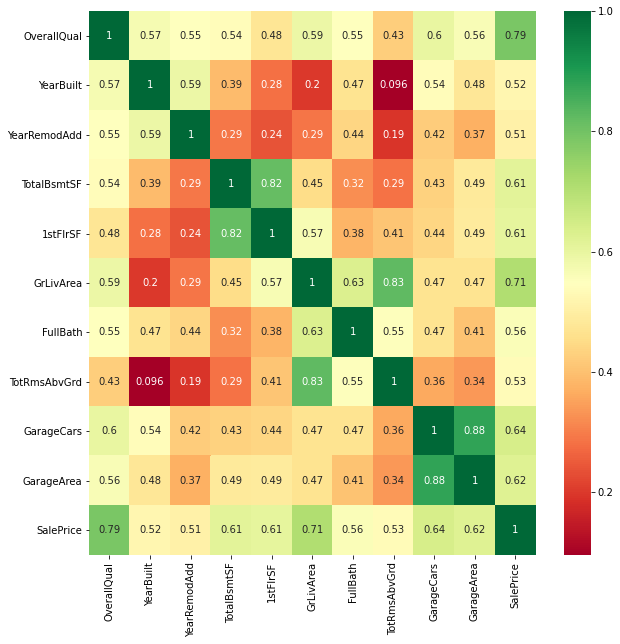

In [5]:
correlatedMatrix = train.corr()
mostCorrelatedFeatures = correlatedMatrix.index[abs(correlatedMatrix["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[mostCorrelatedFeatures].corr(),annot=True,cmap="RdYlGn")

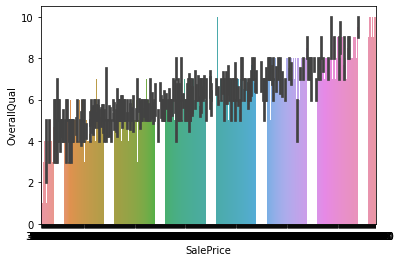

In [6]:
sns.barplot(train.SalePrice, train.OverallQual)

In [14]:
plt.subplot2grid((0,2),(0,0))
from scipy import stats
sns.distplot(train.SalePrice,fit=stats.norm)

plt.subplot2grid((0,2),(0,1))
from scipy import stats
sns.distplot(train.SalePrice,fit=stats.lognorm)

plt.show()

IndexError: ignored

<Figure size 432x288 with 0 Axes>

shapiro-wilk test to know if the data is normally distributed

In [0]:
from scipy import stats
stats.shapiro(train.SalePrice)

(0.869671642780304, 3.206247534576162e-33)

In [0]:
train = train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,)

In [16]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [0]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
train.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9c3856450>,
      dtype=object)

In [0]:
train[['MSSubClass', 'SalePrice']].groupby(['MSSubClass']).mean()


In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))


sns.barplot(x='MSSubClass', y='SalePrice', data=train, ax=axis1)
sns.barplot(x='MSZoning', y='SalePrice', data=train, ax=axis2)
sns.barplot(x='LotFrontage', y='SalePrice', data=train, ax=axis3)

In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,6)


sns.barplot(x='LotArea', y='SalePrice', data=train, ax=axis1)
sns.barplot(x='Street', y='SalePrice', data=train, ax=axis2)
sns.barplot(x='Alley', y='SalePrice', data=train, ax=axis3)

SyntaxError: invalid syntax (<ipython-input-21-7b50b5f0df8f>, line 4)

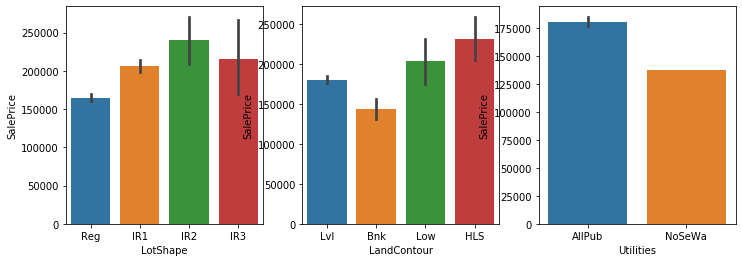

In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='LotShape',y='SalePrice', data=train, ax=axis1)
sns.barplot(x='LandContour', y='SalePrice',data=train, ax=axis2)
sns.barplot(x='Utilities',y='SalePrice',data=train,ax=axis3)


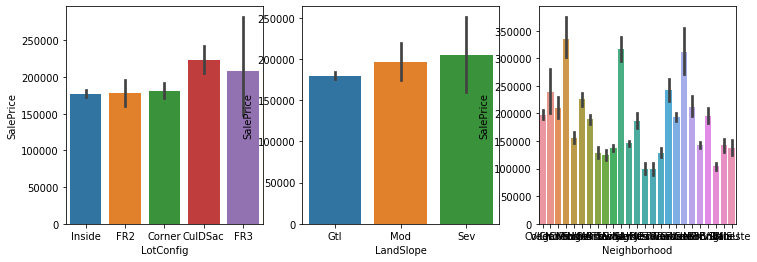

In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))


sns.barplot(x='LotConfig',y='SalePrice',data=train,ax=axis1)
sns.barplot(x='LandSlope',y='SalePrice',data=train,ax=axis2)
sns.barplot(x='Neighborhood',y='SalePrice',data=train,ax=axis3)

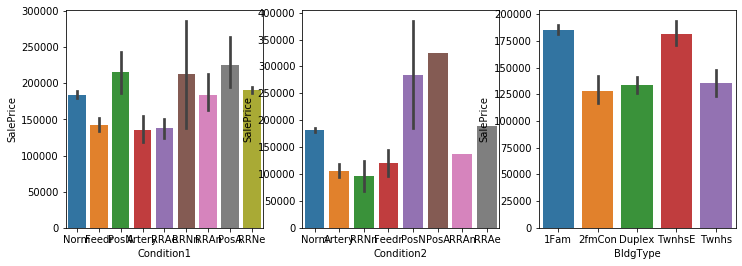

In [0]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))


sns.barplot(x='Condition1',y='SalePrice',data=train,ax=axis1)
sns.barplot(x='Condition2',y='SalePrice',data=train,ax=axis2)
sns.barplot(x='BldgType',y='SalePrice',data=train,ax=axis3)

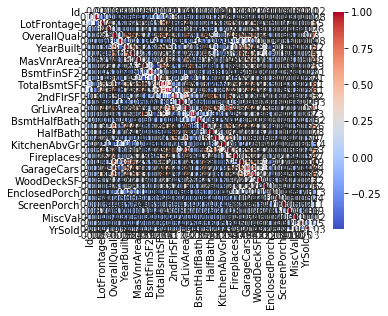

In [0]:
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [17]:
train.shape


(1460, 81)

In [23]:
names = [train.columns]
print(names)

[Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDriv

NameError: ignored